# Computer Vision - P3

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments need to be in **English**.

- The deliverable of both parts must be a file named **P3_Student1_Student2.zip** that includes:
    - The notebook P3_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): November 1st, 23:00 h** 

==============================================================================================
## Practicum 3: Image and Video Segmentation

==============================================================================================

The main topics of Laboratory 3 are:

3.1. Segmentation of video shots with static scenes.

3.2. Background subtraction.

3.3. Segmentation of images.

The following chapters of the book “Computer Vision: Algorithms and Applicatons” from Richard Szeliski have further information about the topic:

* Chapter 4: Computer Vision: Algorithms and Applications.

* Chapter 5: Segmentation.



## Video segmentation

Given the video stored in ‘Barcelona-sequence’, which contains images acquired by a static camera, we ask you to:
- Find the temporal segments of the video (shots). Where the scene change? (Section 3.1)
- Extract the background images and thus, remove all the "artifacts" considered as foreground related to movement. (Section 3.2)




<img src="images/screenshot.png" width=600>

## 3.1 Segmentation of video shots

Read and visualize the sequence of images "images/Barcelona-sequence".

**Hint:** In order to read a collection of images, we wil use the function [animation.FuncAnimation](https://matplotlib.org/2.0.0/api/_as_gen/matplotlib.animation.FuncAnimation.html). Observe in the following Example, how FuncAnimation is used to read and visualize a sequence of frames. Explore the parameters of animation.FuncAnimation().

In [2]:
# Example
import numpy as np
import skimage
from skimage import io, img_as_float
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.exposure import histogram
from skimage.color import rgb2gray
ic = io.ImageCollection('images/Barcelona-sequence/*.png')

In [3]:
#Changing the pluggin is necessary always when visualizing a video!
%matplotlib nbagg  

In [4]:
# Reading a sequence of images from a folder
ic = io.ImageCollection('images/Barcelona-sequence/*.png')

In [5]:
fig = plt.figure()  # Create figure
im = plt.imshow(ic[0], animated=True) #Visualize the first image

def run(i):   #Updating the frame visualization
    im.set_array(ic[i]) #Changing the content of the canvas
    return im, #to return a tuple!

plt.show()
ani = animation.FuncAnimation(fig, run, interval=1, blit=True, frames=len(ic), repeat= False)
plt.show()

<IPython.core.display.Javascript object>

a) Find where a shot (scene) finishes and the following starts (the shot boundaries). To achieve this goal, we are going to compute the difference between the histograms of consecutive frames. The proposed solution required:

- Compute the histogram for each RGB channel

- The 'total' histogram of the image is computed as the sum of the three histograms

- Compute the mean of the difference (in absolute value) between the histograms of two consecutive frames

Those differences with largest values corresponds to the transitions between shots. 

Therefore, **we need to create a funtion which return an array with the differences between histograms. We will plot the resulting array in order to localice the maximum values as well as a suitable threshold to define localize the transitions.**

<img src="images/histogramshot.png" width=600>
<img src="images/difference_histograms.png">

To solve this exercise, you need to create a **temporal plot** showing a frame by frame difference measure to be defined by you, being applicable to distinguish the shots. Define a criterion to detect the boundaries of the shots and visualize it in a static plot.

In [6]:
# Your solution here

def img_to_rgb_hist(image, nbins):
    '''
    this function grabs an image and cast it to float, then
    we return the three histograms one for each RGB channel
    '''
    image = img_as_float(image)
    return [histogram(image[:, :, rgb], nbins)[0] for rgb in range(3)]

In [7]:
def temporal_plot(images):
    '''
    this functios shows a temporal plot with the mean of the diferences 
    between each histogram of a frame and the next one.
    '''
    tmp = []

    for i in range(len(images) - 1):
        difference = [abs(img_to_rgb_hist(images[i], 8)[rgb] - img_to_rgb_hist(images[i+1], 8)[rgb]) for rgb in range (3)]
        tmp.append(np.mean(difference))
    
    plt.plot(tmp)
    plt.show()

temporal_plot(ic)

<IPython.core.display.Javascript object>

b) Additionally, create an interactive plot executing the following code in "Example A". Substitute the bottom plot with the temporal plot showing the differences between the consecutive frames. 

In [8]:
# Example A
def data_gen():
    # keep values of histograms of each frame 
    # in list "h" so we can access previous ones
    h = []
    
    t = data_gen.t
    cnt = 0

    while cnt < 1000:       
        # create histogram of "cnt" frame of our "ic" video
        hist = img_to_rgb_hist(ic[cnt], 8)
        mean = 0
        # If there are previous histograms in our "h" list
        if len(h) > 0:
            # calculate the difference between current and previous histograms
            dif = [abs(hist[rgb] - h[-1][rgb]) for rgb in range (3)]
            # obtain mean of the difference
            mean = np.mean(dif)
        #add current hist to h list
        h.append(hist)     
        
        cnt+=1
        t += 0.05

        y = mean

        yield t, y

data_gen.t = 0


In [9]:
# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2,1)

# intialize a line object on the second axes for plotting
line, = ax2.plot([], [], lw=2, color='r')

ax2.set_ylim(0, 1.1)
ax2.set_xlim(0, 5)
ax2.grid()

# initialize data arrays 
xdata, ydata = [], []
def run(data):
    # update data plot
    t, y = data
    xdata.append(t) # time = x axis
    ydata.append(y) # y axis

    # Plot image on top row
    ax1.imshow(ic[len(xdata)])
          
    # Plot sin in bottom row
    xmin, xmax = ax2.get_xlim()
    ymin, ymax = ax2.get_ylim()
    
    if t >= xmax:
        ax2.set_xlim(xmin, 2*xmax)
        ax2.figure.canvas.draw()
    
    if y >= ymax:
        ax2.set_ylim(ymin,2*ymax)
        ax2.figure.canvas.draw()
            
    # update the data of both line objects
    line.set_data(xdata, ydata)

    return line

ani = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=10, repeat=False)
plt.show()

<IPython.core.display.Javascript object>

c) Show the initial and final images of each shot extracted as follows:

<img src="images_for_notebook/result_shot_detection.png">


Use the previous plot to define the proper threshold value over the differences of histograms. Use the threshold to localize indexes of the array returned by the function proposed in the previous question and, therefore, localize the initial and final frames for each shot.


In [10]:
# Your solution here

# When the mean of the differences between
# the three histograms (one for each RGB channel)
# of a frame and its previous (or following)
# is bigger, by default, than 10000 (value  
# chosen by observing the transition between scenes
# in the temporal plot)

def get_scenes(images, threshold = 10000): 
    '''
    this function returns a list containing the indices
    of first and lat frames of diferent scenes
    '''
    scenes = [0]
    for i in range(2, len(images)):
        dif = [abs(img_to_rgb_hist(images[i], 8)[rgb] - img_to_rgb_hist(images[i-1], 8)[rgb]) for rgb in range (3)]
        
        if np.mean(dif) > threshold: # if mean dif is bigger by default, than 10000
            # we put last frame of past scene and first frame of current one
            scenes.append(i - 1)
            scenes.append(i)  
            
    # add the last frame
    scenes.append(i)
    
    return scenes

In [11]:
# The function "show_scenes" takes the indexes 
# of the key frames (when a shot begins or ends)
# we can get with the function "get_scenes" 
# and shows the corresponding frames

def show_scenes(scenes, images):
    '''
    this function shows frames (in this case, 
    it shows the frames we obtain with the get_scenes function)
    '''
    fig = plt.figure(figsize=(8,12))
    for p in range(len(scenes)):

        ax = fig.add_subplot(len(scenes)//2, 2, p + 1)
        plt.imshow(images[scenes[p]])

        if p % 2 == 0:
            ax.title.set_text("Begin of scene")
        else:
            ax.title.set_text("End of scene")

scenes = get_scenes(ic)
show_scenes(scenes, ic)

<IPython.core.display.Javascript object>

**d) Which measure have you used in order to visually distinguish the shots in a plot? Explain your solution.**

We've calculated the mean of the difference between the three histograms (one for each RGB channel) of a frame and its following. We can see that the difference right when the shot changes is considerably big (as we've checked in the temporal plot, at least bigger than 10000).

**e) Would your video segmentation strategy be able to separate and track objects? Argue your answer.**

No. Our video segmentation is mainly based on the differences between histograms, and histograms can't give us any spacial information, for it's only a graphical representation of the tonal distribution of an image. In order to do so, we should take account of spatial coordinates along with the intensity values we've already considered.

**f) Would your video segmentation strategy be able to capture continuous transition? Argue your answer.**

No, it wouldn't. The reason why is because our method only contemplates a "drastic" change in the scene (a considerable difference between the consecutive histograms). If the video had a continuous transition, the difference between each immediate frame would be much insignificant, and so our method couldn't tell.

## 3.2 Background subtraction

Apply the background subtraction algorithm (check theory material).

<img src="images/screenshot2.png" width=500>

a) Visualize the following images for each different scene of the video:

    1) an image belonging to the shot
    2) the background image, and
    3) the foreground.
    
**Hint**: You can construct a mask obtained from the original image and the background in order to know which parts of the image form part from the foreground and recover from the original image just the foreground regions.

In [12]:
# Your solution here
# This function will plot the original, background and foreground image
def show_imgs(original, background, foregorund, scene_num):
    '''
    we made this function to show orig, 
    background and foreground images of scenes
    '''
    # create plot
    fig, axis = plt.subplots(1,3, figsize=(15,15))    
    
    # original image
    axis[0].imshow(original, cmap='gray') 
    axis[0].set_title("Original img " + str(scene_num))    
    axis[0].axis('off')
    
    # background image
    axis[1].imshow(background, cmap='gray') 
    axis[1].set_title("Background Image " + str(scene_num))    
    axis[1].axis('off')
    
    # foreground image
    axis[2].imshow(foregorund, cmap="gray") 
    axis[2].set_title("Foreground Image " + str(scene_num))
    axis[2].axis('off')
    
    plt.show() 

from skimage.color import rgb2gray

# This function will get the background and extract the foreground
def get_background_foreground(images,start, finish, threshold = 0.1):
    '''
    this function extracts de foreground
    '''
    # Create a black background
    bgrnd = np.zeros(images[0].shape)
    # List with all the images of the scenes
    frames = []
    # List to save float images of each channel
    frames_channels = [[],[],[]]
    
    # Iterate over all frames
    for i in range(start, finish+1):
        # cast all frames to float
        frames.append(img_as_float(images[i]))
        
        # cast all channels to float
        for j in range(3):
            frames_channels[j] += [img_as_float(images[i][:, :, j])]
    
    # median of all frames
    for i in range(3):
        bgrnd[:,:,i] = np.median(frames_channels[i], axis=0)
    
    # To get foreground we have to remove background
    fgrnd = np.abs(frames[0] - bgrnd)
    # convert image to grayscale
    fgrnd_gray = rgb2gray(fgrnd)
    # Binarize foreground (to see it better)
    fgrnd_gray[fgrnd_gray <= threshold] = 0
    fgrnd_gray[fgrnd_gray > threshold] = 1
    
    fgrnd_gray = rgb2gray(fgrnd)
    
    return bgrnd, fgrnd, fgrnd_gray



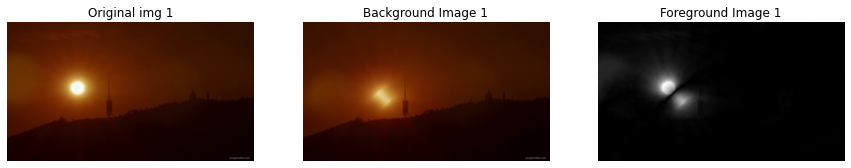

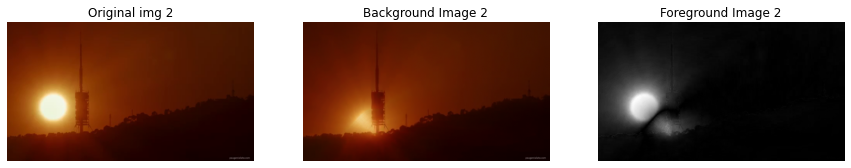

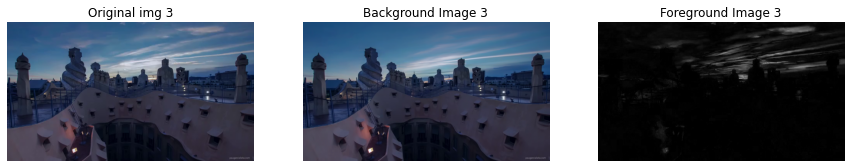

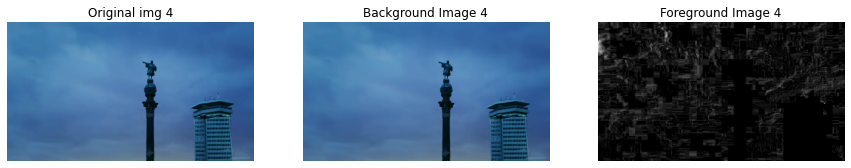

In [13]:
%matplotlib inline

# Scene counter
num = 1
# Get all the scenes of the video
scenes = get_scenes(ic, 10000)

for i in range(0, len(scenes), 2):
    # background, foreground and foreground in gray levels
    bg, fg, aux = get_background_foreground(ic, scenes[i], scenes[i+1], 0.2)
    # Plot results
    show_imgs(ic[scenes[i]], bg, aux, num)
    num += 1

**b) What do the static background images represent?**

 They represent the pixels that have not moved in all the frames of the scene. 

**c) What happens if the shots are not correctly extracted? And, what happens if you find too many shots in the video?**

 By not being extracted correctly, different scenes could be put together and that would make the average of the images erroneous. 

**d) What happens if you subtract the background image from the original one?**

 The foreground is obtained. 

**e) In which situations does the algorithm work and in which it does not? Do you see any additional application for this algorithm?**

 In the case of having a blurred image or with much noise, or even with many dynamic elements, the result would not be so precise. 

f) **[OPTIONAL]**
- Apply the algorithm to some other video that you found.

In [14]:
# Your solution here


## 3.3 Segmentation of images

Apply the image segmentation methods (Felzenswhalbs, Slic and Quickshift) based on the clustering of points corresponding to the pixels but in the feature space RGB-XY space.

**Hint**: 
- Different image segmentation commands can be found in skimage.segmentation.
- Use the function segmentation.mark_boundaries for seeing the boundaries of the segments.
- Use the inline pluggin to visualize images (%matplotlib inline).

<img src="images/image_Segmentation.png" width=600>

### Felzenszwalb's efficient graph based segmentation

a) Read 'rocki.jpeg' image from the folder 'images' and segment it using the Felzenszwalbs's method. Comment the result.


Text(0.5, 1.0, 'Rocki Felzenszwalb \n scale = 100, sigma = 0.5, min_size = 50')

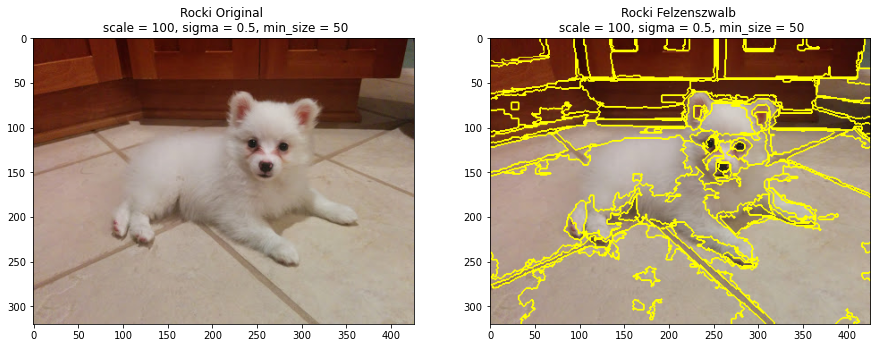

In [15]:
# Your solution here
%matplotlib inline
from skimage.segmentation import felzenszwalb
from skimage.segmentation import mark_boundaries

# setting the figure size as 15, 15
plt.figure(figsize=(15,15))

# read the image
rocki = io.imread("images/dog.jpg")

rocki_segmented = felzenszwalb(rocki, scale=100, sigma=0.5, min_size=50)

# plotting the original image
plt.subplot(1,2,1)
plt.imshow(rocki)
plt.title("Rocki Original \n scale = 100, sigma = 0.5, min_size = 50")

# Marking the bounderies
plt.subplot(1,2,2)
rocki_felzenszwalb_boundaries = mark_boundaries(rocki, rocki_segmented)
plt.imshow(rocki_felzenszwalb_boundaries)
plt.title("Rocki Felzenszwalb \n scale = 100, sigma = 0.5, min_size = 50")



b) Test and explore different parameters in order to obtain a good image segmentation up to you. 
Answer the following qüestions:
- Is it critical to convert the image in grayscale in order to do the image segmentation?
- Is it critical to convert the image in float in order to do the image segmentation?
- Which are the optimal values according to your subjective perception?
- How does each parameter behave?

Note: You can reduce the size of the image in order to accelerate the running. Does the image reduction affect the optimal values? 



### ANSWERS
#### Is it critical to convert the image in grayscale in order to do the image segmentation?
It's not critical because the Felzenszwalb's efficient graph is a 2D segmentation algorithm.

#### Which are the optimal values according to your subjective perception?
If we want more segments, a larger scale would be great. On the other hand, a low sigma is always better for not losing details of well-defined structures

#### How does each parameter behave?
Scale influences the segment size.
Sigma is the diameter of a Gaussian kernel.
Min_size is for setting the minimum size component.



Text(0.5, 1.0, 'increasing the sigma\n scale = 100, sigma = 1, min_size = 50')

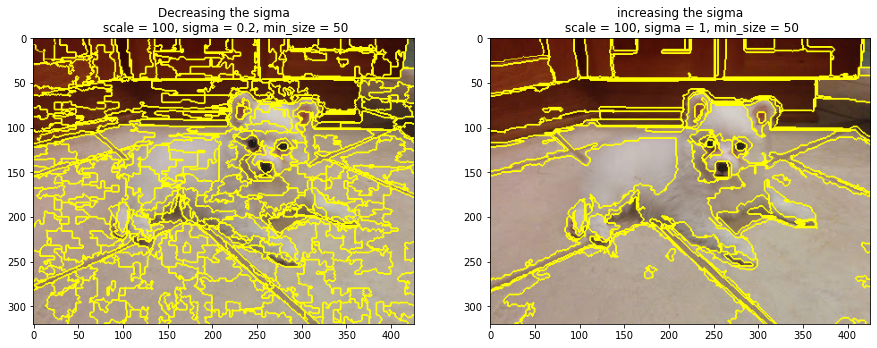

In [16]:
# Your solution here
# Modify "sigma" value
%matplotlib inline
from skimage.segmentation import felzenszwalb
from skimage.segmentation import mark_boundaries

# setting the figure size as 15, 15
figure = plt.figure(figsize=(15,15))

# read the image
rocki = io.imread("images/dog.jpg")

# plotting the original image
ax = figure.add_subplot(1,2,1)

rocki_segmented = felzenszwalb(rocki, scale=100, sigma=0.2, min_size=50)
plt.imshow(mark_boundaries(rocki, rocki_segmented))
plt.title("Decreasing the sigma\n scale = 100, sigma = 0.2, min_size = 50")

# plotting the original image
ax = figure.add_subplot(1,2,2)

rocki_segmented = felzenszwalb(rocki, scale=100, sigma=1, min_size=50)
plt.imshow(mark_boundaries(rocki, rocki_segmented))
plt.title("increasing the sigma\n scale = 100, sigma = 1, min_size = 50")



Text(0.5, 1.0, 'Increasingthe scale\n scale = 200, sigma = 0.5, min_size = 50')

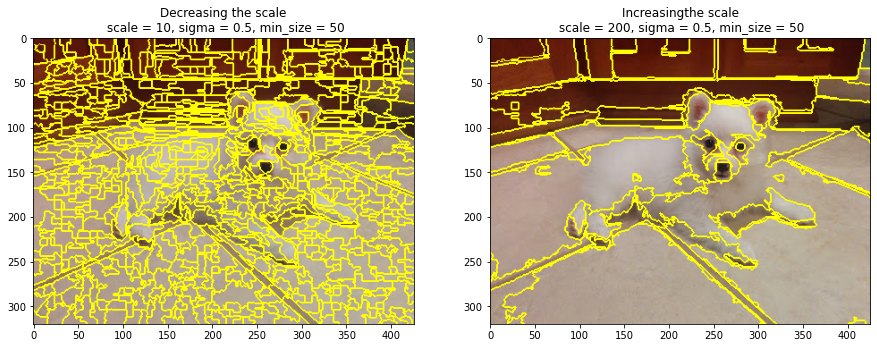

In [17]:
# Your solution here
# Modify "scale" value
%matplotlib inline
from skimage.segmentation import felzenszwalb
from skimage.segmentation import mark_boundaries

# setting the figure size as 15, 15
figure = plt.figure(figsize=(15,15))

# read the image
rocki = io.imread("images/dog.jpg")

# plotting the original image
ax = figure.add_subplot(1,2,1)

rocki_segmented = felzenszwalb(rocki, scale=10, sigma=0.5, min_size=50)
plt.imshow(mark_boundaries(rocki, rocki_segmented))
plt.title("Decreasing the scale\n scale = 10, sigma = 0.5, min_size = 50")

# plotting the original image
ax = figure.add_subplot(1,2,2)

rocki_segmented = felzenszwalb(rocki, scale=200, sigma=0.5, min_size=50)
plt.imshow(mark_boundaries(rocki, rocki_segmented))
plt.title("Increasingthe scale\n scale = 200, sigma = 0.5, min_size = 50")


Text(0.5, 1.0, 'Increasingthe min_size\n scale = 200, sigma = 0.5, min_size = 100')

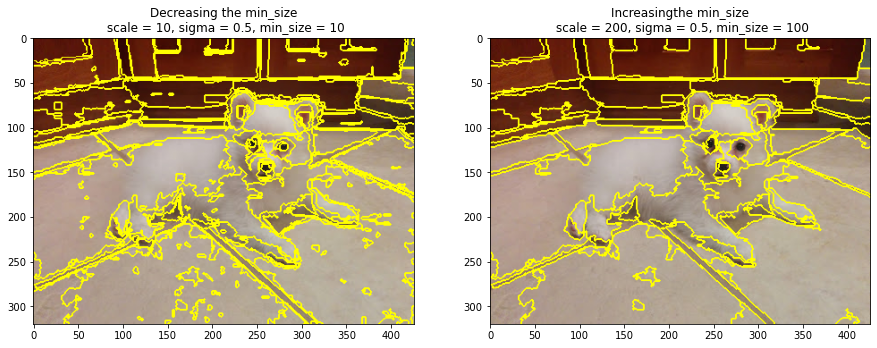

In [18]:
# Your solution here
# Modify "min_size" value
%matplotlib inline
from skimage.segmentation import felzenszwalb
from skimage.segmentation import mark_boundaries

# setting the figure size as 15, 15
figure = plt.figure(figsize=(15,15))

# read the image
rocki = io.imread("images/dog.jpg")

# plotting the original image
ax = figure.add_subplot(1,2,1)

rocki_segmented = felzenszwalb(rocki, scale=100, sigma=0.5, min_size=10)
plt.imshow(mark_boundaries(rocki, rocki_segmented))
plt.title("Decreasing the min_size\n scale = 10, sigma = 0.5, min_size = 10")

# plotting the original image
ax = figure.add_subplot(1,2,2)

rocki_segmented = felzenszwalb(rocki, scale=100, sigma=0.5, min_size=100)
plt.imshow(mark_boundaries(rocki, rocki_segmented))
plt.title("Increasingthe min_size\n scale = 200, sigma = 0.5, min_size = 100")


c) Comment the definition of the algorithm (use approximately 3 lines at most), its advantages and disadvantages.

# Your solution here
The algorithm computes Felsenszwalb’s efficient graph based image segmentation. It produces an oversegmentation of a multichannel (i.e. RGB) image using a fast, minimum spanning tree based clustering on the image grid.

### SLIC - K-Means based image segmentation
d) Segment the same image using the SLIC image segmentation algorithm using the parameters by default. 

Text(0.5, 1.0, 'Rocki Slic')

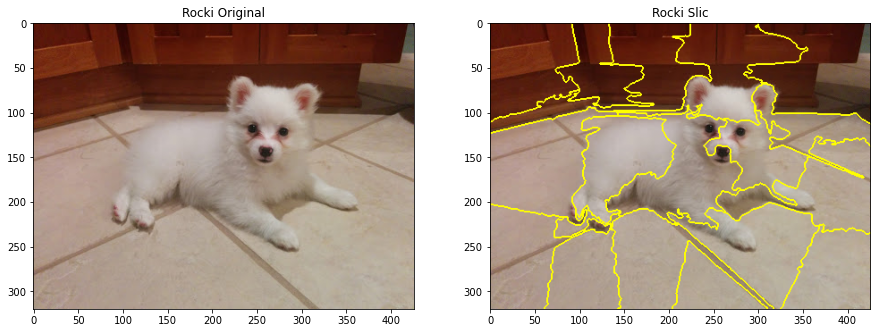

In [19]:
# Your solution here
%matplotlib inline
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries

# setting the figure size as 15, 15
plt.figure(figsize=(15,15))

# read the image
rocki = io.imread("images/dog.jpg")

rocki_segmented = slic(rocki, n_segments=25, compactness=10, sigma=1,start_label=1)

# plotting the original image
plt.subplot(1,2,1)
plt.imshow(rocki)
plt.title("Rocki Original")

# Marking the bounderies
plt.subplot(1,2,2)
rocki_slic_boundaries = mark_boundaries(rocki, rocki_segmented)
plt.imshow(rocki_slic_boundaries)
plt.title("Rocki Slic")


e) Explore what are the parameters of the slic function. Test different values for these parameters in order to obtain a good image segmentation with SLIC algorithm.
Answer the following qüestions:
- Is it critical to convert the image in grayscale in order to do the image segmentation?
- Is it critical to convert the image in float in order to do the image segmentation?
- Which are the optimal values of the optional valriables?
- How does each parameter behave?

### ANSWERS
#### Is it critical to convert the image in grayscale in order to do the image segmentation?
It's critical because SLIC -K-Means based perfoms in the 5D space of color information.

#### Which are the optimal values according to your subjective perception?
n_segments will depend on it, the more segments, the higher the value has to be. For the compactness possible values on a log scale.
Low sigma is always better for not losing details of well-defined structures

#### How does each parameter behave?
n_segments selects the number of kmeans centers.
The compactness parameter trades off color-similarity and proximity that is determines the ratio between spatial and color parameters ratio.
Sigma determines smoothing of the image before processing.



f) Comment what the algorithm is (in up to 3 lines).

This algorithm simply performs K-means in the 5d space of color information and image location and is therefore closely related to quickshift. As the clustering method is simpler, it is very efficient. It is essential for this algorithm to work in Lab color space to obtain good results. 

Text(0.5, 1.0, 'Increasingthe n_segments')

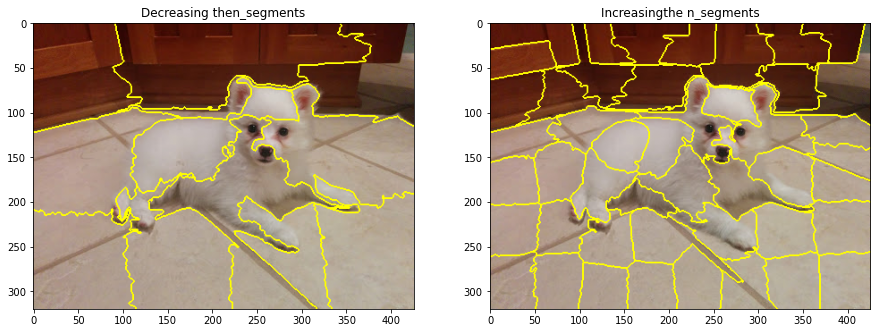

In [20]:
# Your solution here
# Modify "n_segments" value
%matplotlib inline
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries

# setting the figure size as 15, 15
figure = plt.figure(figsize=(15,15))

# read the image
rocki = io.imread("images/dog.jpg")

# plotting the original image
ax = figure.add_subplot(1,2,1)

rocki_segmented = slic(rocki, n_segments=10, compactness=10, sigma=1,start_label=1)
plt.imshow(mark_boundaries(rocki, rocki_segmented))
plt.title("Decreasing then_segments")

# plotting the original image
ax = figure.add_subplot(1,2,2)

rocki_segmented = slic(rocki, n_segments=50, compactness=10, sigma=1,start_label=1)
plt.imshow(mark_boundaries(rocki, rocki_segmented))
plt.title("Increasingthe n_segments")

Text(0.5, 1.0, 'Increasingthe compactness')

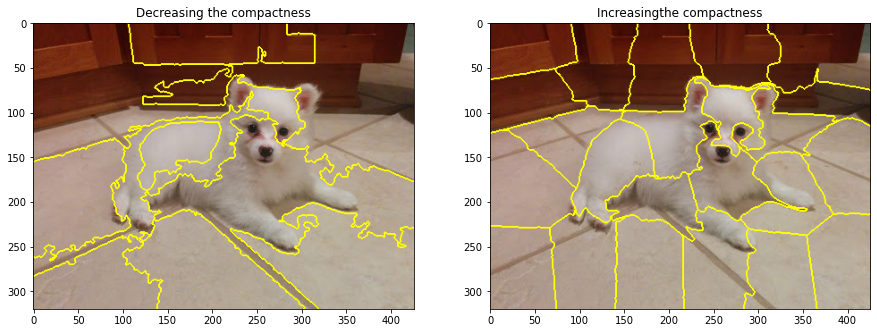

In [21]:
# Your solution here
# Modify "compactness" value
%matplotlib inline
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries

# setting the figure size as 15, 15
figure = plt.figure(figsize=(15,15))

# read the image
rocki = io.imread("images/dog.jpg")

# plotting the original image
ax = figure.add_subplot(1,2,1)

rocki_segmented = slic(rocki, n_segments=25, compactness=0.5, sigma=1,start_label=1)
plt.imshow(mark_boundaries(rocki, rocki_segmented))
plt.title("Decreasing the compactness")

# plotting the original image
ax = figure.add_subplot(1,2,2)

rocki_segmented = slic(rocki, n_segments=25, compactness=20, sigma=1,start_label=1)
plt.imshow(mark_boundaries(rocki, rocki_segmented))
plt.title("Increasingthe compactness")

Text(0.5, 1.0, 'Increasingthe sigma')

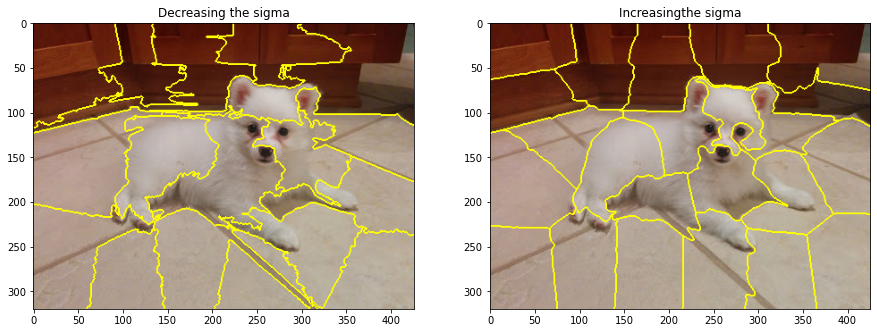

In [22]:
# Your solution here
# Modify "sigma" value
%matplotlib inline
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries

# setting the figure size as 15, 15
figure = plt.figure(figsize=(15,15))

# read the image
rocki = io.imread("images/dog.jpg")

# plotting the original image
ax = figure.add_subplot(1,2,1)

rocki_segmented = slic(rocki, n_segments=25, compactness=10, sigma=0.5,start_label=1)
plt.imshow(mark_boundaries(rocki, rocki_segmented))
plt.title("Decreasing the sigma")

# plotting the original image
ax = figure.add_subplot(1,2,2)

rocki_segmented = slic(rocki, n_segments=25, compactness=20, sigma=1.5,start_label=1)
plt.imshow(mark_boundaries(rocki, rocki_segmented))
plt.title("Increasingthe sigma")

### Quickshift image segmentation

g) Segment the same image using the Quickshift algorithm. 

Text(0.5, 1.0, 'Rocki Quickshift')

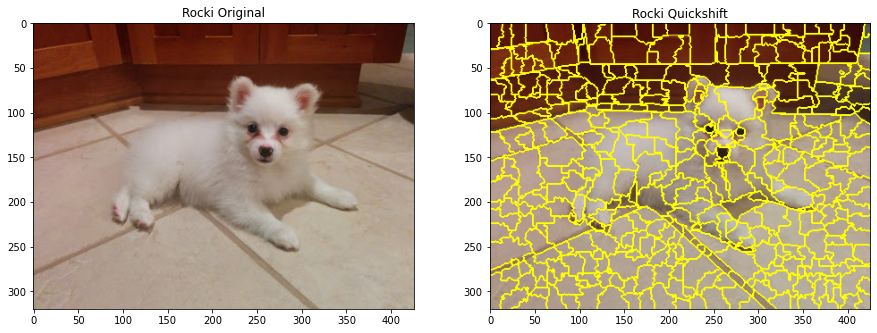

In [23]:
# Your solution here
%matplotlib inline
from skimage.segmentation import quickshift
from skimage.segmentation import mark_boundaries

# setting the figure size as 15, 15
plt.figure(figsize=(15,15))

# read the image
rocki = io.imread("images/dog.jpg")

rocki_segmented = quickshift(rocki, kernel_size=3, max_dist=6, ratio=0.5)
# plotting the original image
plt.subplot(1,2,1)
plt.imshow(rocki)
plt.title("Rocki Original")

# Marking the bounderies
plt.subplot(1,2,2)
rocki_quickshift_boundaries = mark_boundaries(rocki, rocki_segmented)
plt.imshow(rocki_quickshift_boundaries)
plt.title("Rocki Quickshift")


h) Test different parameters in order to obtain a good image segmentation with Quickshift algorithm.
Answer the following qüestions:
- Which are the optimal values?
- How does each parameter behave?

### ANSWERS

#### Which are the optimal values according to your subjective perception?
A kernel_size greater than 5 is much more useful for obtaining more grouped segments, although that would make the algorithm take more time to process

#### How does each parameter behave?
The kernel_size corresponds to the width of Gaussian kernel.
Max_dist selects a level in the hierarchical segmentation that is produced.
Ratio balances color-space proximity and image-space proximity.
Sigma determines smoothing of the image before processing.



Text(0.5, 1.0, 'Increasing the kernel_size')

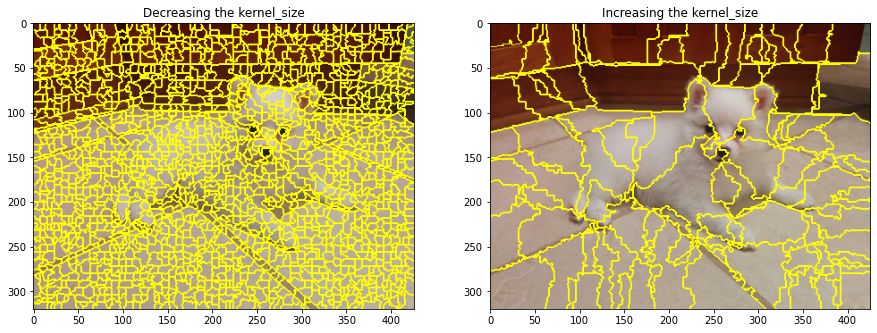

In [24]:
# Your solution here
# Modify "kernel_size" value
%matplotlib inline
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries

# setting the figure size as 15, 15
figure = plt.figure(figsize=(15,15))

# read the image
rocki = io.imread("images/dog.jpg")

# plotting the original image
ax = figure.add_subplot(1,2,1)

rocki_segmented = quickshift(rocki, kernel_size=1, max_dist=6, ratio=0.5)
plt.imshow(mark_boundaries(rocki, rocki_segmented))
plt.title("Decreasing the kernel_size")

# plotting the original image
ax = figure.add_subplot(1,2,2)

rocki_segmented = quickshift(rocki, kernel_size=10, max_dist=6, ratio=0.5)
plt.imshow(mark_boundaries(rocki, rocki_segmented))
plt.title("Increasing the kernel_size")

Text(0.5, 1.0, 'Increasingthe max_dist')

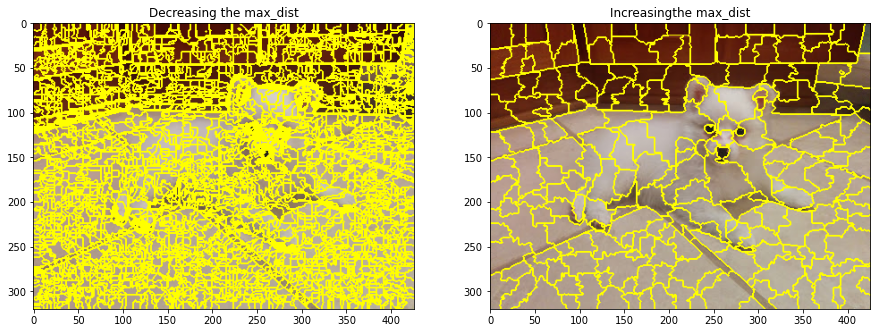

In [25]:
# Your solution here
# Modify "max_dist" value
%matplotlib inline
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries

# setting the figure size as 15, 15
figure = plt.figure(figsize=(15,15))

# read the image
rocki = io.imread("images/dog.jpg")

# plotting the original image
ax = figure.add_subplot(1,2,1)

rocki_segmented = quickshift(rocki, kernel_size=3, max_dist=2, ratio=0.5)
plt.imshow(mark_boundaries(rocki, rocki_segmented))
plt.title("Decreasing the max_dist")

# plotting the original image
ax = figure.add_subplot(1,2,2)

rocki_segmented = quickshift(rocki, kernel_size=3, max_dist=10, ratio=0.5)
plt.imshow(mark_boundaries(rocki, rocki_segmented))
plt.title("Increasingthe max_dist")

Text(0.5, 1.0, 'Increasingthe ratio')

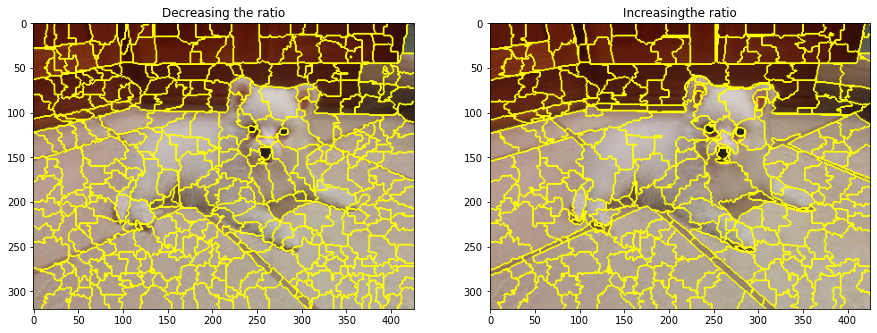

In [26]:
# Your solution here
# Modify "ratio" value
%matplotlib inline
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries

# setting the figure size as 15, 15
figure = plt.figure(figsize=(15,15))

# read the image
rocki = io.imread("images/dog.jpg")

# plotting the original image
ax = figure.add_subplot(1,2,1)

rocki_segmented = quickshift(rocki, kernel_size=3, max_dist=6, ratio=0.1)
plt.imshow(mark_boundaries(rocki, rocki_segmented))
plt.title("Decreasing the ratio")

# plotting the original image
ax = figure.add_subplot(1,2,2)

rocki_segmented = quickshift(rocki, kernel_size=3, max_dist=10, ratio=1)
plt.imshow(mark_boundaries(rocki, rocki_segmented))
plt.title("Increasingthe ratio")

i) Comment what the algorithm is (in up to 3 lines).

Quickshift is a relatively recent 2D image segmentation algorithm, based on an approximation of kernelized mean-shift. Therefore it belongs to the family of local mode-seeking algorithms and is applied to the 5D space consisting of color information and image location.

One of the benefits of quickshift is that it actually computes a hierarchical segmentation on multiple scales simultaneously.


### Comparison of segmentation algorithms
j) Plot the original image and the results of both algorithms in a 1x3 subplot using the optimal values.

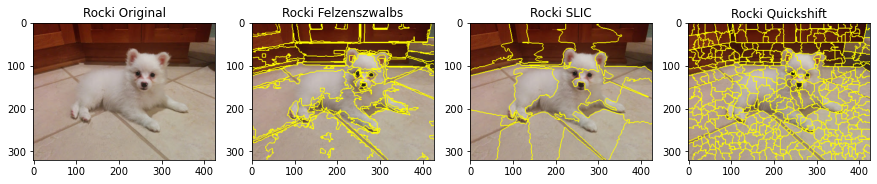

In [27]:
# Your solution here
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(1,4,1)
plt.imshow(rocki)
ax.title.set_text("Rocki Original")

ax = fig.add_subplot(1,4,2)
plt.imshow(rocki_felzenszwalb_boundaries)
ax.title.set_text("Rocki Felzenszwalbs")

ax = fig.add_subplot(1,4,3)
plt.imshow(rocki_slic_boundaries)
ax.title.set_text("Rocki SLIC")

ax= fig.add_subplot(1,4,4)
plt.imshow(rocki_quickshift_boundaries)
ax.title.set_text("Rocki Quickshift")

k) Calculate also the number of segments obtained on the image by each of the algorithms. Can the number of segments can be used as a criterion for the performance of the algorithms?

In [28]:
# Your solution here
print(f"Felzenszwalb number of segments: {len(np.unique(rocki_felzenszwalb_boundaries))}")
print(f"SLIC number of segments: {len(np.unique(rocki_slic_boundaries))}")
print(f"Quickshift number of segments: {len(np.unique(rocki_quickshift_boundaries))}")

Felzenszwalb number of segments: 222
SLIC number of segments: 222
Quickshift number of segments: 220


l) Comment the differences between each method as well as their advantages and disadvantages.

These methods differ mostly because we can change different parameters in each case and the results we can obtain from them.

In the Felzenszwalb method, the parameter scale determines the observation level. Sigma is the diameter of the Gaussian kernel used to smooth the image before segmentation. The number of segments generated and their size can only be controlled indirectly through scaling. Fragment sizes in an image can vary greatly due to local contrast.

Using the SLIC procedure, the parameter n_segments corresponds to the number of labels in the segmented output image. Compactness balances proximity to color and proximity to space. The sigma parameter is the width of the preprocessed Gaussian smoothing kernel for each dimension of the image. In the case of scalar values, the same sigma is applied to each dimension.

Finally, with the quickshift method, the higher the max_dist parameter, the fewer clusters. The Ratio parameter balances color space proximity and image space proximity. Higher values give more weight to the color space.

The pros and cons of each approach largely depend on what we intend to use them for. In general, we can assume that the SLIC method (due to its n_segments parameter) is the "most accurate" or controllable method when a certain number of clusters or segments are required, followed by Felzenszwalb (due to its scale parameter).

m) Choose another couple of color and grayscale images from the folder 'images' as well as from internet and apply the three segmentation methods. Comment the results.

Text(0.5, 1.0, 'Doulphin Quickshift')

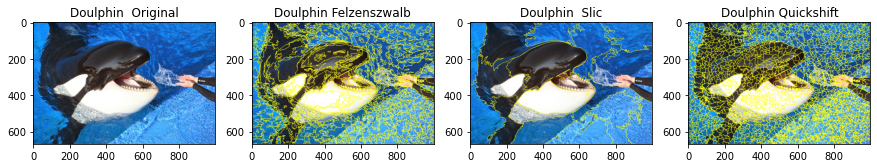

In [29]:
# Your solution here
%matplotlib inline
from skimage.segmentation import quickshift, felzenszwalb, slic
from skimage.segmentation import mark_boundaries

# setting the figure size as 15, 15
plt.figure(figsize=(15,15))

# read the image
rocki = io.imread("images/doulphin.jpg")

# plotting the original image
plt.subplot(1,4,1)
plt.imshow(rocki)
plt.title("Doulphin  Original")

plt.subplot(1,4,2)
d_segmented_1 = felzenszwalb(rocki, scale=100, sigma=0.5, min_size=50)
d_felzenszwalb_boundaries = mark_boundaries(rocki, d_segmented_1)
plt.imshow(d_felzenszwalb_boundaries)
plt.title("Doulphin Felzenszwalb")

# Marking the bounderies
plt.subplot(1,4,3)
rocki_segmented = slic(rocki, n_segments=25, compactness=10, sigma=1,start_label=1)
rocki_slic_boundaries = mark_boundaries(rocki, rocki_segmented)
plt.imshow(rocki_slic_boundaries)
plt.title("Doulphin  Slic")

# Marking the bounderies
plt.subplot(1,4,4)
d_segmented_2 = quickshift(rocki, kernel_size=3, max_dist=6, ratio=0.5)
rocki_quickshift_boundaries = mark_boundaries(rocki, d_segmented_2)
plt.imshow(rocki_quickshift_boundaries)
plt.title("Doulphin Quickshift")


Text(0.5, 1.0, 'Doulphin  Quickshift')

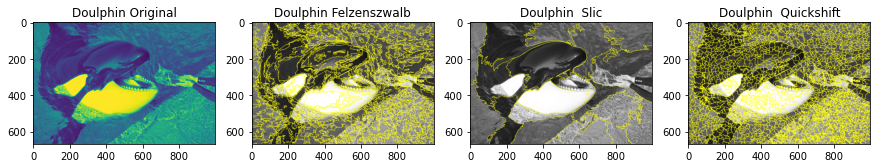

In [30]:
# Your solution here
%matplotlib inline
from skimage.color import rgb2gray
from skimage import color
from skimage.segmentation import quickshift, felzenszwalb, slic
from skimage.segmentation import mark_boundaries

# setting the figure size as 15, 15
plt.figure(figsize=(15,15))

# read the image
rocki = io.imread("images/doulphin.jpg")
imgGray = color.rgb2gray(rocki)

# plotting the original image
plt.subplot(1,4,1)
plt.imshow(imgGray)
plt.title("Doulphin Original")

plt.subplot(1,4,2)
d_segmented_1 = felzenszwalb(rocki, scale=100, sigma=0.5, min_size=50)
d_felzenszwalb_boundaries = mark_boundaries(imgGray, d_segmented_1)
plt.imshow(d_felzenszwalb_boundaries)
plt.title("Doulphin Felzenszwalb")

# Marking the bounderies
plt.subplot(1,4,3)
rocki_segmented = slic(rocki, n_segments=25, compactness=10, sigma=1,start_label=1)
rocki_slic_boundaries = mark_boundaries(imgGray, rocki_segmented)
plt.imshow(rocki_slic_boundaries)
plt.title("Doulphin  Slic")

# Marking the bounderies
plt.subplot(1,4,4)
d_segmented_2 = quickshift(rocki, kernel_size=3, max_dist=6, ratio=0.5)
rocki_quickshift_boundaries = mark_boundaries(imgGray, d_segmented_2)
plt.imshow(rocki_quickshift_boundaries)
plt.title("Doulphin  Quickshift")

